#02 - Visualización de Datos con el Dataset Wine

Este notebook explora el dataset `Wine` mediante gráficos básicos, avanzados y uno interactivo. Se utilizan las librerías Matplotlib, Seaborn y Plotly para representar visualmente la información y facilitar la interpretación de los datos.

**Estudiantes:**  David Francisco Alvarez,  Macerlo Xavier Castillo, Alejandro Sebastian Casto, Lady Anahi Garces
Daniela Estefania Pezantez, María Mercedes Vera.

**Materia:** Inteligencia Artificial  
**Actividad:** 1  
**Docente:** Gladys Villegas, PhD(c)

In [13]:
# Verificar versión de Python y GPU
import sys
print("Versión de Python:", sys.version)

import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías necesarias
!pip install seaborn plotly --quiet

# Importar librerías
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Estilo visual
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

Entorno configurado correctamente en Google Colab


##Cargar el dataset

El dataset `Wine` contiene información química de distintos tipos de vino. A continuación se carga y se transforma en un DataFrame.

In [14]:
# Cargar el dataset
wine = load_wine()

#Convertir a DataFrame
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Agregar la columna objetivo (clase del vino)
wine_df['target'] = wine.target


# Mostrar las primeras filas
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
# Cargar el dataset
wine = load_wine()

#Convertir a DataFrame
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Agregar la columna objetivo (clase del vino)
wine_df['target'] = wine.target

# Ver dimensiones del dataset
filas, columnas = wine_df.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.\n")

# Mostrar las primeras filas
wine_df.head()


El DataFrame tiene 178 filas y 14 columnas.



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##Gráficos básicos y avanzados con Matplotlib

 **Histrograma - Distribución del alcohol por clase**

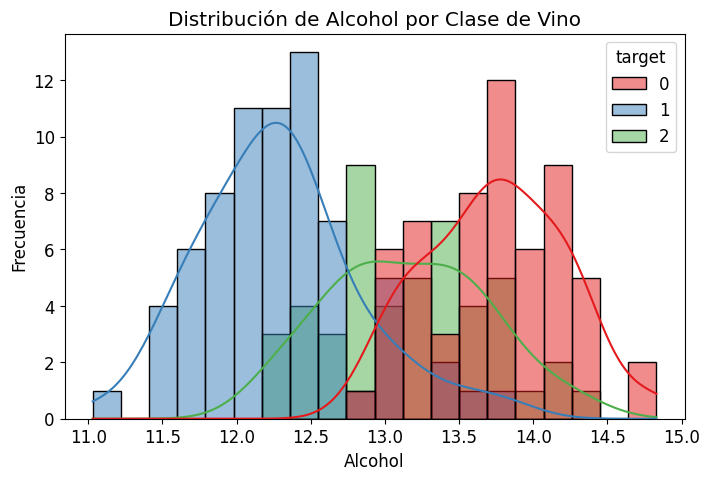

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=wine_df, x='alcohol', hue='target', kde=True, bins=20, palette='Set1')
plt.title("Distribución de Alcohol por Clase de Vino")
plt.xlabel("Alcohol")
plt.ylabel("Frecuencia")
plt.show()

- La **clase 0** tiende a tener **niveles más altos de alcohol**, con muchos vinos por encima de 13.5%.
- Las **clases 1 y 2** presentan una distribución más centrada entre 12.5% y 13.5%.
- Esto sugiere que el **nivel de alcohol puede ser una variable discriminante** entre clases.

**Gráfico de barras - Conteo de muestras por clase**

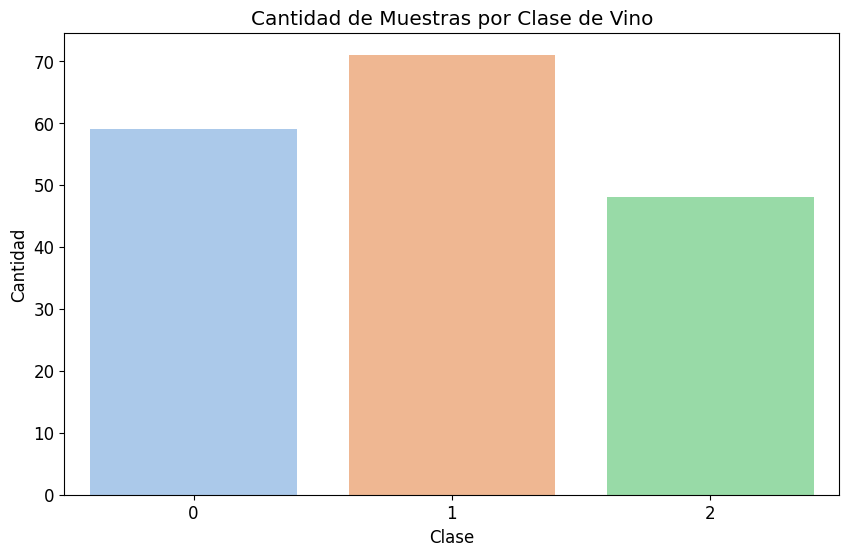

In [17]:
sns.countplot(data=wine_df, x='target', palette='pastel')
plt.title("Cantidad de Muestras por Clase de Vino")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

- Las tres clases están **balanceadas**, aunque la clase 1 tiene ligeramente más muestras.
- Esto es útil al aplicar modelos de clasificación.

**Boxplot - Distribución de flavonoides por clase

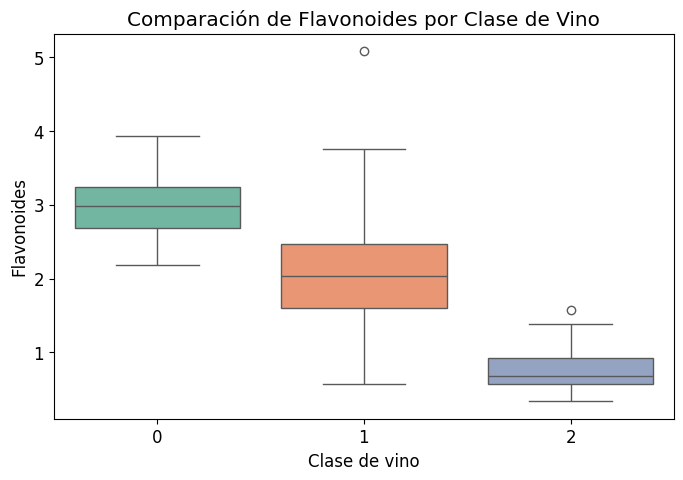

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=wine_df, x='target', y='flavanoids', palette='Set2')
plt.title("Comparación de Flavonoides por Clase de Vino")
plt.xlabel("Clase de vino")
plt.ylabel("Flavonoides")
plt.show()

- La **clase 0** tiene los niveles **más altos y consistentes** de flavonoides.
- La **clase 2** muestra los **niveles más bajos**, con menor variabilidad.
- Esto indica que los flavonoides son una **característica relevante para diferenciar tipos de vino**, ya que están relacionados con sabor, cuerpo y color del vino.

**Gráfico de dispersión: alcohol vs. color_intensity**

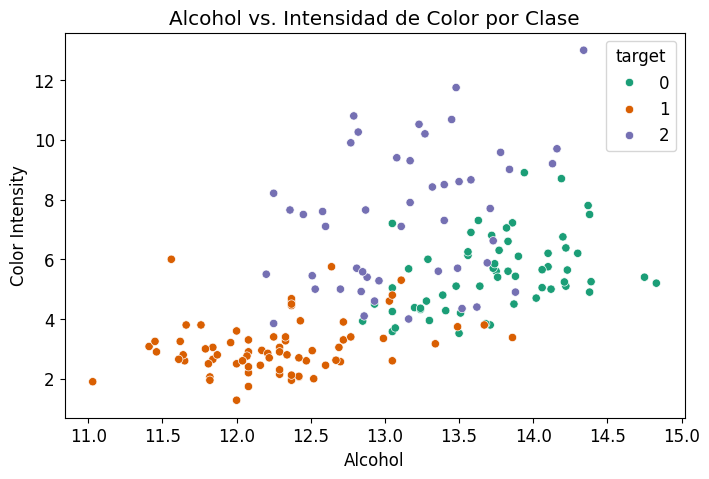

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=wine_df, x='alcohol', y='color_intensity', hue='target', palette='Dark2')
plt.title("Alcohol vs. Intensidad de Color por Clase")
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.show()

- Los vinos de **clase 0** tienden a tener **alto alcohol y menor color intensity**.
- La **clase 2**, en cambio, suele mostrar **más intensidad de color** con **menores niveles de alcohol**.
- La clase 1 está más distribuida en el centro.

**Diagrama de pares - Visualización múltiple entre características**

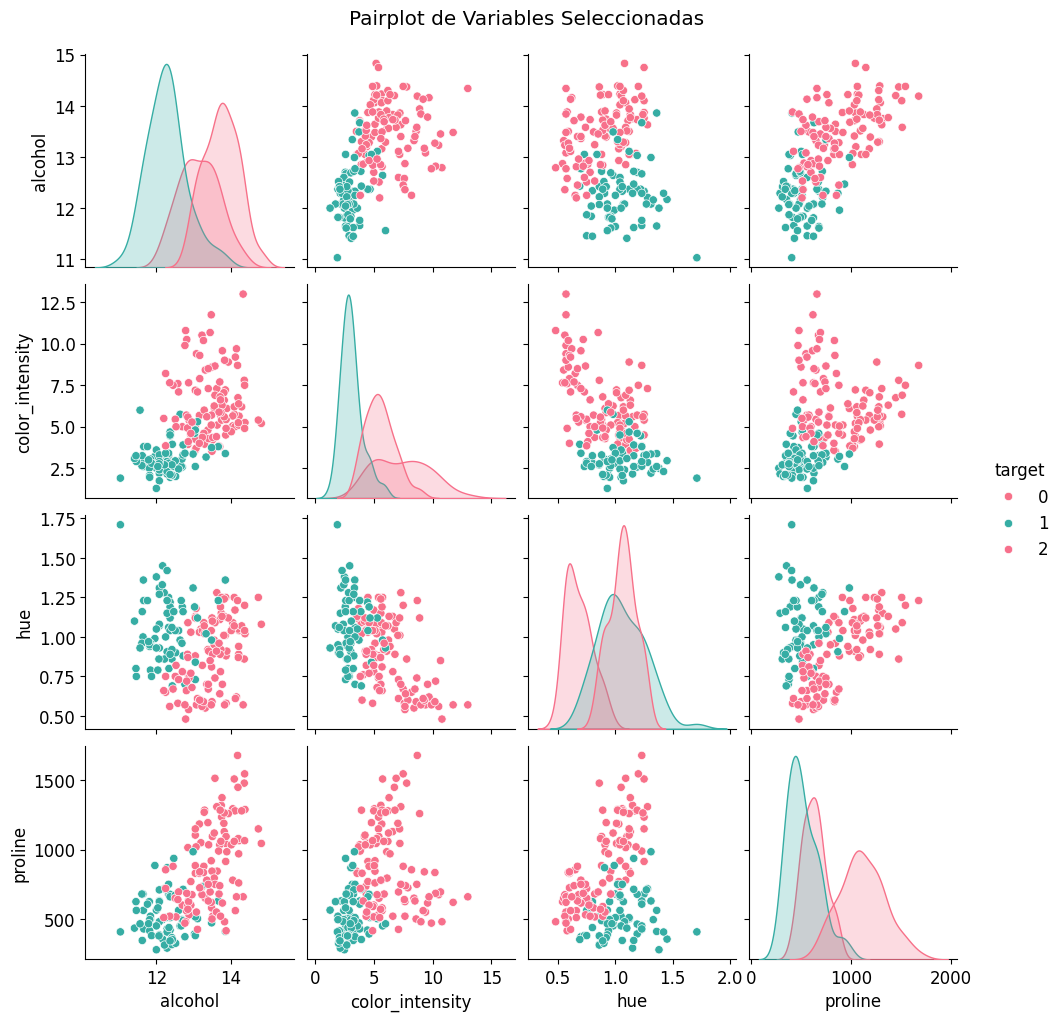

In [20]:
sns.pairplot(wine_df[['alcohol', 'color_intensity', 'hue', 'proline', 'target']], hue='target', palette='husl')
plt.suptitle("Pairplot de Variables Seleccionadas", y=1.02)
plt.show()

- Algunas variables como `proline`, `color_intensity` y `alcohol` muestran **patrones claros** de separación entre clases.

**Mapa de calor de correlaciones**

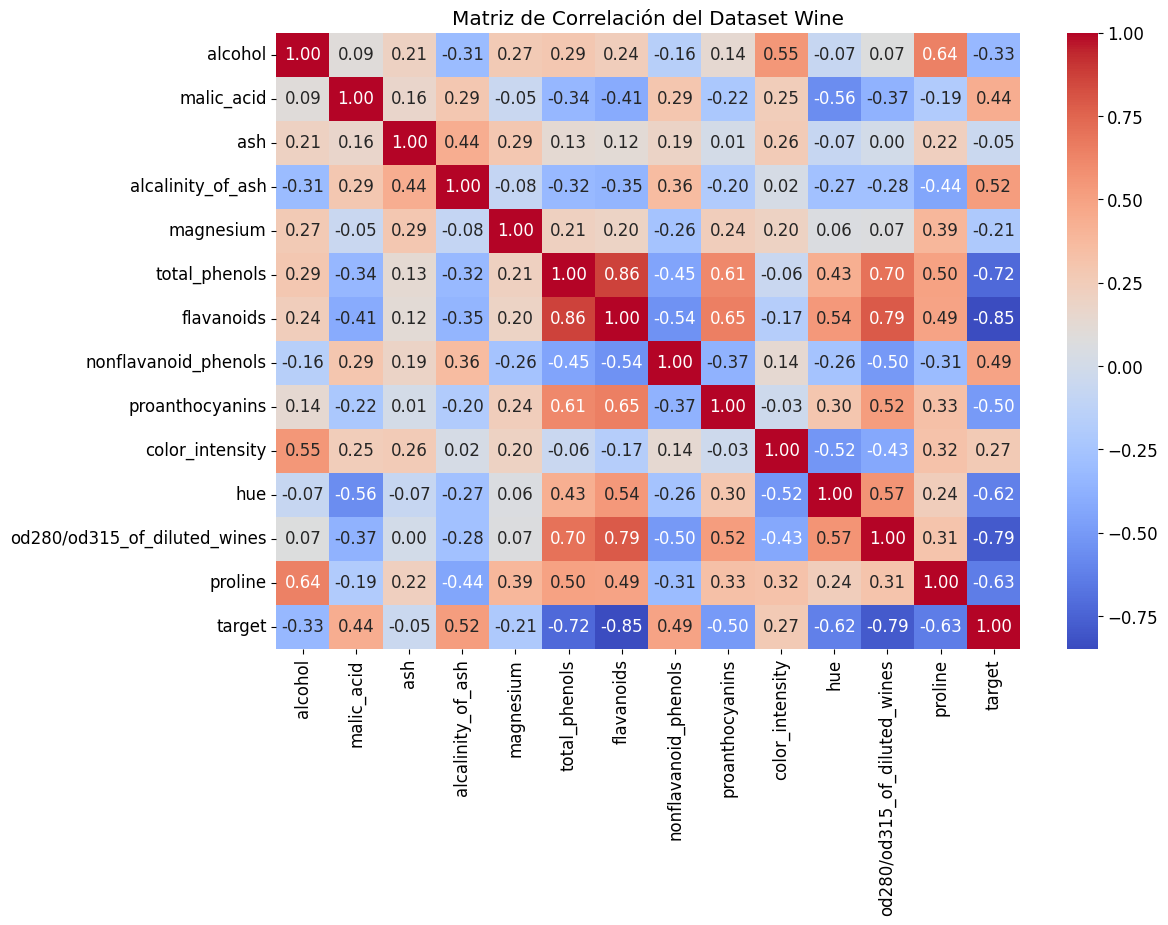

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación del Dataset Wine")
plt.show()

- Hay **alta correlación positiva entre:**
  - `flavanoids` y `total_phenols`
  - `od280/od315_of_diluted_wines` y `flavanoids`
- `color_intensity` tiene **baja o negativa correlación** con la mayoría de variables, lo que la hace interesante por su independencia.

Estas correlaciones ayudan a identificar **variables redundantes** y posibles **indicadores clave para clasificación**.

**Histograma superpuesto - Distribución de alcohol por clase de vino.**

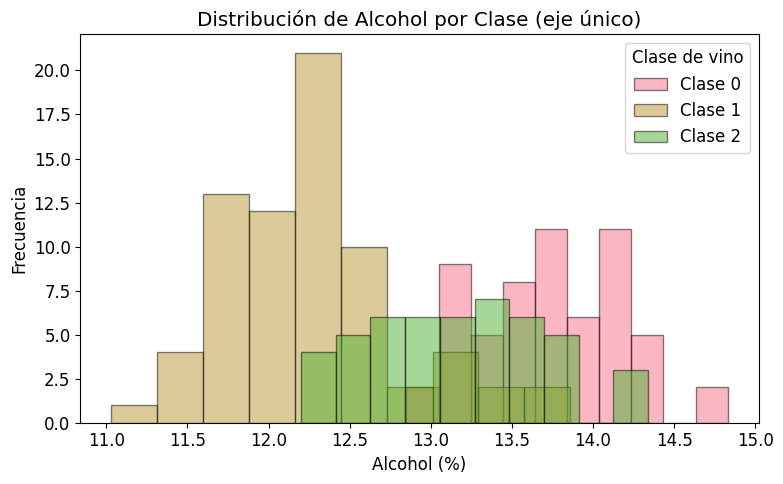

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
# Histograma para cada clase
ax.hist(
    wine_df.loc[wine_df.target == 0, 'alcohol'],
    bins=10,
    alpha=0.5,
    label='Clase 0',
    edgecolor='black'
)
ax.hist(
    wine_df.loc[wine_df.target == 1, 'alcohol'],
    bins=10,
    alpha=0.5,
    label='Clase 1',
    edgecolor='black'
)
ax.hist(
    wine_df.loc[wine_df.target == 2, 'alcohol'],
    bins=10,
    alpha=0.5,
    label='Clase 2',
    edgecolor='black'
)

# Personalización del gráfico
ax.set_title('Distribución de Alcohol por Clase (eje único)')
ax.set_xlabel('Alcohol (%)')
ax.set_ylabel('Frecuencia')
ax.legend(title='Clase de vino')

plt.tight_layout()
plt.show()


* La Clase 0 muestra mayor frecuencia de vinos con alto contenido de alcohol, en especial por encima de 13.5%.

* La Clase 1 se concentra más en valores bajos de alcohol, entre 11.5% y 12.5%.

* La Clase 2 se ubica mayormente entre 12.5% y 13.5%, mostrando una distribución intermedia.

* La variable alcohol parece ser útil para distinguir entre las clases de vino, especialmente la clase 0.

**Gráfico con ejes duales: Alcohol vs Color Intensity**

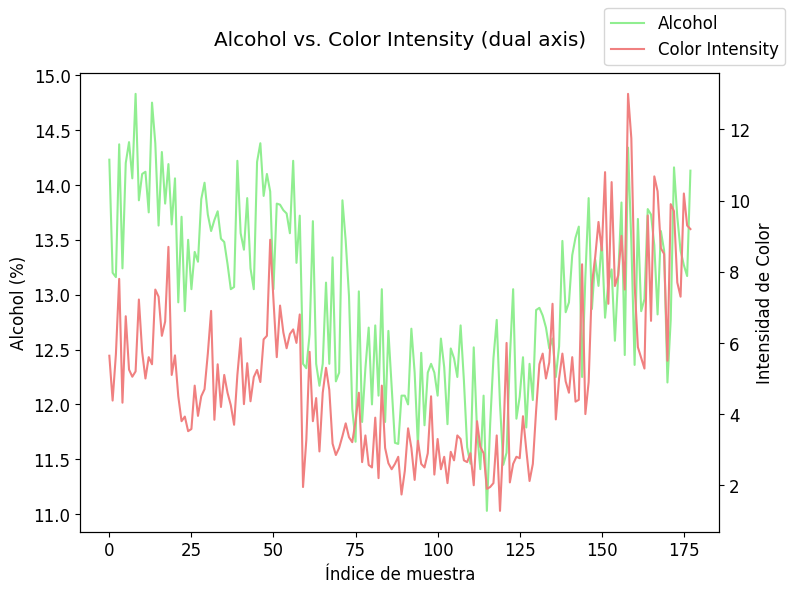

In [23]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Primer eje: Alcohol
ax1.plot(wine_df['alcohol'], color='lightgreen', label='Alcohol')
ax1.set_xlabel('Índice de muestra')
ax1.set_ylabel('Alcohol (%)')
ax1.tick_params(axis='y')

# Segundo eje: Intensidad de color
ax2 = ax1.twinx()
ax2.plot(wine_df['color_intensity'], color='lightcoral', label='Color Intensity')
ax2.set_ylabel('Intensidad de Color')
ax2.tick_params(axis='y')

# Leyenda y título
fig.legend(loc='upper right')
ax1.set_title('Alcohol vs. Color Intensity (dual axis)', pad=20)

# Ajustes finales
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

Este gráfico permite comparar visualmente dos variables que tienen escalas distintas:

* El eje izquierdo muestra el porcentaje de alcohol en cada muestra.

* El eje derecho muestra la intensidad de color correspondiente.

* Se pueden notar patrones similares en algunas zonas, lo que sugiere una posible relación entre el contenido de alcohol y la intensidad del color del vino.

## Gráfico interactivo con Plotly

**Relación entre alcohol e intensidad de color**

In [24]:
fig = px.scatter(wine_df, x='alcohol', y='color_intensity', color=wine_df['target'].astype(str),
                 labels={'alcohol': 'Alcohol', 'color_intensity': 'Intensidad de Color', 'color': 'Clase'},
                 title="Relación entre Alcohol e Intensidad de Color por Clase")
fig.show()

- Este gráfico interactivo permite explorar cómo se agrupan las clases según **alcohol e intensidad de color**.
- La **clase 0** domina regiones de alto alcohol pero baja intensidad.
- La **clase 2** tiende a estar en regiones de alta intensidad de color.

**Conclusiones**
- Se usaron histogramas, boxplots, pairplots y gráficos interactivos para **explorar visualmente** el dataset `Wine`.
- Se identificaron patrones útiles entre clases, especialmente en `alcohol`, `color_intensity` y `proline`.
- Estas visualizaciones ayudarán a **seleccionar variables** para los modelos de la siguiente etapa.